# (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter.

In [18]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/assignment1"
if not os.path.exists(datadir):
  !ln -s "/content/drive/My Drive/CS444Assignment1/assignment1/" $datadir
os.chdir(datadir)
!pwd

/content/drive/My Drive/CS444Assignment1/assignment1


In [4]:
# downloading Fashion-MNIST
import os
os.chdir(os.path.join(datadir,"fashion-mnist/"))
!chmod +x ./get_data.sh
!./get_data.sh
os.chdir(datadir)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4318k  100 4318k    0     0  12.2M      0 --:--:-- --:--:-- --:--:-- 12.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5148  100  5148    0     0  26091      0 --:--:-- --:--:-- --:--:-- 26131
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.1M  100 25.1M    0     0  28.4M      0 --:--:-- --:--:-- --:--:-- 28.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29515  100 29515    0     0   218k      0 --:--:-- --:--:-- --:--:--  218k


# Imports

In [20]:
import random
import numpy as np
from data_process import get_FASHION_data, get_RICE_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic
from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Fashion-MNIST

In the following cells we determine the number of images for each split and load the images.
<br />
TRAIN_IMAGES + VAL_IMAGES = (0, 60000]
, TEST_IMAGES = 10000

In [21]:
# You can change these numbers for experimentation
# For submission we will use the default values
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
normalize = True

In [22]:
data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, normalize=normalize)
X_train_fashion, y_train_fashion = data['X_train'], data['y_train']
X_val_fashion, y_val_fashion = data['X_val'], data['y_val']
X_test_fashion, y_test_fashion = data['X_test'], data['y_test']
n_class_fashion = len(np.unique(y_test_fashion))

# Loading Rice

In [23]:
# loads train / test / val splits of 80%, 20%, 20%
data = get_RICE_data()
X_train_RICE, y_train_RICE = data['X_train'], data['y_train']
X_val_RICE, y_val_RICE = data['X_val'], data['y_val']
X_test_RICE, y_test_RICE = data['X_test'], data['y_test']
n_class_RICE = len(np.unique(y_test_RICE))

print("Number of train samples: ", X_train_RICE.shape[0])
print("Number of val samples: ", X_val_RICE.shape[0])
print("Number of test samples: ", X_test_RICE.shape[0])

Number of train samples:  10911
Number of val samples:  3637
Number of test samples:  3637


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [24]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100


# Perceptron

Perceptron has 2 hyperparameters, "learning rate" and "number of epochs" that you can experiment with:
### Hyperparameter 1: Learning rate
The learning rate controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. Here is a guide to help you find a right learning rate:
- Try values ranging from 0.0005 to 5.0 to see the impact on model accuracy.
- If the loss oscillates a lot or the loss diverges, the learning rate may be too high. Try decreasing it by a factor of 10 (e.g. from 0.5 to 0.05).
- If the loss decreases very slowly, the learning rate may be too low and the training can take a long time. Try increasing it by a factor of 10.
- You can also try adding a learning rate decay to slowly reduce the learning rate over each training epoch. For example, multiply the learning rate by 0.95 after each epoch.
- Plot training and validation accuracy over epochs for different learning rates. This will help you visualize the impact of the learning rate.
- [Here](https://towardsdatascience.com/https-medium-com-dashingaditya-rakhecha-understanding-learning-rate-dd5da26bb6de) is a detailed guide to learning rate.

### Hyperparameter 2: Number of Epochs
- An epoch is a complete iterative pass over the training dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the perceptron update rule for each sample in the training set.
- By observing the training and validation accuracy graphs, you can determine if the model has converged or not. Try increasing the number of epochs if the model is not converging or has low accuracy.
- You should try different values for the number of training epochs and report your results.

In this section, you will implement the Perceptron classifier in the **models/perceptron.py** script.

The following code:
- Creates an instance of the Perceptron classifier class
- An instance of the Perceptron class is trained on the training data using its train method.
- We use the predict method to find the training accuracy as well as the testing accuracy


## Train Perceptron on Fashion-MNIST

Epoch 1/40, Accuracy: 78.2700
Epoch 1/40, Loss: 624284.5302
Epoch 2/40, Accuracy: 82.8820
Epoch 2/40, Loss: 225690.2662
Epoch 3/40, Accuracy: 83.9400
Epoch 3/40, Loss: 139696.8508
Epoch 4/40, Accuracy: 84.1400
Epoch 4/40, Loss: 117709.2094
Epoch 5/40, Accuracy: 84.5440
Epoch 5/40, Loss: 107437.2022
Epoch 6/40, Accuracy: 84.7440
Epoch 6/40, Loss: 102014.0169
Epoch 7/40, Accuracy: 84.9160
Epoch 7/40, Loss: 99393.0473
Epoch 8/40, Accuracy: 84.8920
Epoch 8/40, Loss: 98447.2323
Epoch 9/40, Accuracy: 84.8560
Epoch 9/40, Loss: 98235.0448
Epoch 10/40, Accuracy: 84.8680
Epoch 10/40, Loss: 98164.5804
Epoch 11/40, Accuracy: 84.8740
Epoch 11/40, Loss: 98137.9467
Epoch 12/40, Accuracy: 84.8680
Epoch 12/40, Loss: 98127.6265
Epoch 13/40, Accuracy: 84.8640
Epoch 13/40, Loss: 98123.5424
Epoch 14/40, Accuracy: 84.8620
Epoch 14/40, Loss: 98121.9133
Epoch 15/40, Accuracy: 84.8580
Epoch 15/40, Loss: 98121.2623
Epoch 16/40, Accuracy: 84.8580
Epoch 16/40, Loss: 98121.0021
Epoch 17/40, Accuracy: 84.8580
Epoch

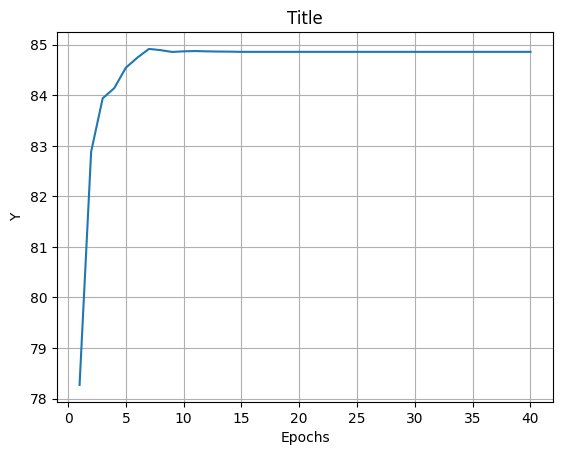

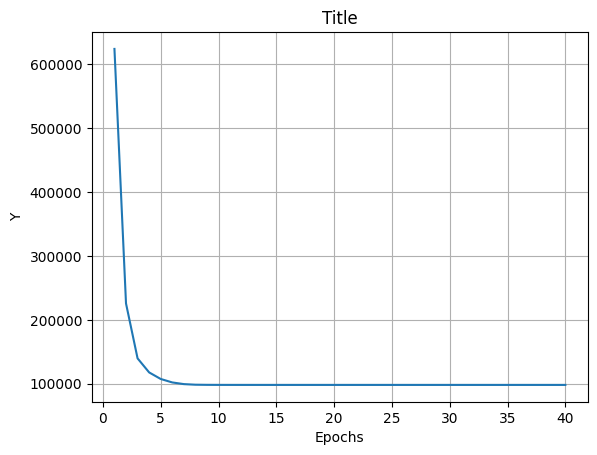

In [25]:
lr = 0.1
n_epochs = 40
percept_fashion = Perceptron(n_class_fashion, lr, n_epochs, X_train_fashion.shape[1], 1,0)

# - Refer to hints in the train method of the Perceptron class in "models/perceptron.py"
percept_fashion.train(X_train_fashion, y_train_fashion)

In [26]:
print(X_train_fashion.shape)

(50000, 784)


In [27]:
pred_percept = percept_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_fashion)))

The training accuracy is given by: 84.858000


### Validate Perceptron on Fashion-MNIST

In [28]:
pred_percept = percept_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_fashion)))

The validation accuracy is given by: 81.910000


### Test Perceptron on Fashion-MNIST

In [29]:
pred_percept = percept_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_fashion)))

The testing accuracy is given by: 81.920000


### Perceptron_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [30]:
output_submission_csv('kaggle/perceptron_submission_fashion.csv', percept_fashion.predict(X_test_fashion))

## Train Perceptron on Rice

Epoch 1/40, Accuracy: 99.9633
Epoch 1/40, Loss: 1.0166
Epoch 2/40, Accuracy: 99.9817
Epoch 2/40, Loss: 0.1240
Epoch 3/40, Accuracy: 100.0000
Epoch 3/40, Loss: 0.0000
Epoch 4/40, Accuracy: 100.0000
Epoch 4/40, Loss: 0.0000
Epoch 5/40, Accuracy: 100.0000
Epoch 5/40, Loss: 0.0000
Epoch 6/40, Accuracy: 100.0000
Epoch 6/40, Loss: 0.0000
Epoch 7/40, Accuracy: 100.0000
Epoch 7/40, Loss: 0.0000
Epoch 8/40, Accuracy: 100.0000
Epoch 8/40, Loss: 0.0000
Epoch 9/40, Accuracy: 100.0000
Epoch 9/40, Loss: 0.0000
Epoch 10/40, Accuracy: 100.0000
Epoch 10/40, Loss: 0.0000
Epoch 11/40, Accuracy: 100.0000
Epoch 11/40, Loss: 0.0000
Epoch 12/40, Accuracy: 100.0000
Epoch 12/40, Loss: 0.0000
Epoch 13/40, Accuracy: 100.0000
Epoch 13/40, Loss: 0.0000
Epoch 14/40, Accuracy: 100.0000
Epoch 14/40, Loss: 0.0000
Epoch 15/40, Accuracy: 100.0000
Epoch 15/40, Loss: 0.0000
Epoch 16/40, Accuracy: 100.0000
Epoch 16/40, Loss: 0.0000
Epoch 17/40, Accuracy: 100.0000
Epoch 17/40, Loss: 0.0000
Epoch 18/40, Accuracy: 100.0000
Ep

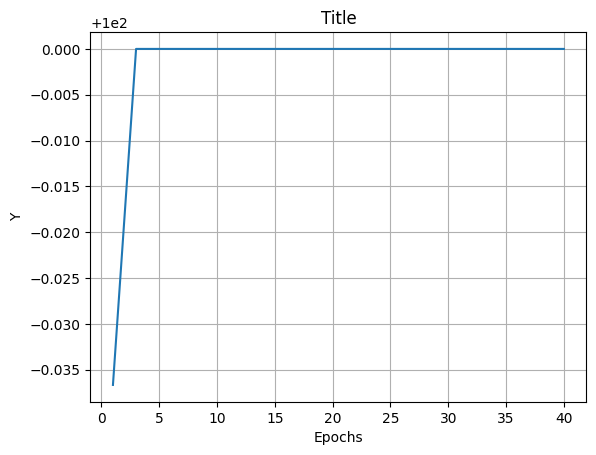

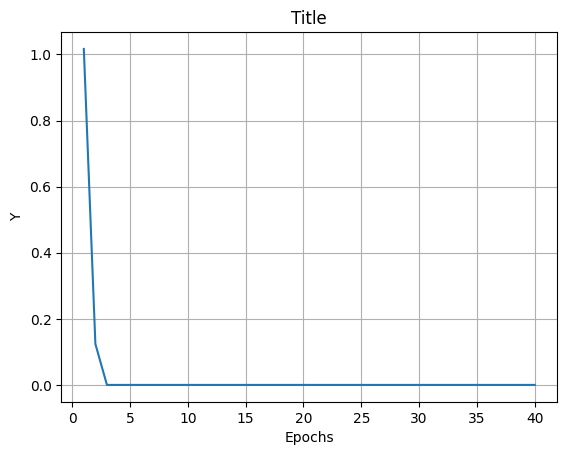

In [31]:
lr = 0.1
n_epochs = 40

percept_RICE = Perceptron(n_class_RICE, lr, n_epochs, X_train_RICE.shape[1], 1,0)
percept_RICE.train(X_train_RICE, y_train_RICE)

In [32]:
pred_percept = percept_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_RICE)))

The training accuracy is given by: 100.000000


### Validate Perceptron on Rice

In [33]:
pred_percept = percept_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_RICE)))

The validation accuracy is given by: 99.972505


### Test Perceptron on Rice

In [34]:
pred_percept = percept_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_RICE)))

The testing accuracy is given by: 100.000000


# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update.
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/svm.py**

The following code:
- Creates an instance of the SVM classifier class
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on Fashion-MNIST

Epoch 1/10, Accuracy: 48.2060
Epoch 1/10, Loss: 8486570.9340
Epoch 2/10, Accuracy: 39.6160
Epoch 2/10, Loss: 7473665.0790
Epoch 3/10, Accuracy: 59.6300
Epoch 3/10, Loss: 709925.8416
Epoch 4/10, Accuracy: 57.8420
Epoch 4/10, Loss: 473633.2978
Epoch 5/10, Accuracy: 67.0180
Epoch 5/10, Loss: 164657.0857
Epoch 6/10, Accuracy: 74.5640
Epoch 6/10, Loss: 72296.7471
Epoch 7/10, Accuracy: 80.1280
Epoch 7/10, Loss: 41544.1495
Epoch 8/10, Accuracy: 84.0840
Epoch 8/10, Loss: 31139.5809
Epoch 9/10, Accuracy: 85.6040
Epoch 9/10, Loss: 27899.7882
Epoch 10/10, Accuracy: 85.9440
Epoch 10/10, Loss: 26977.1580


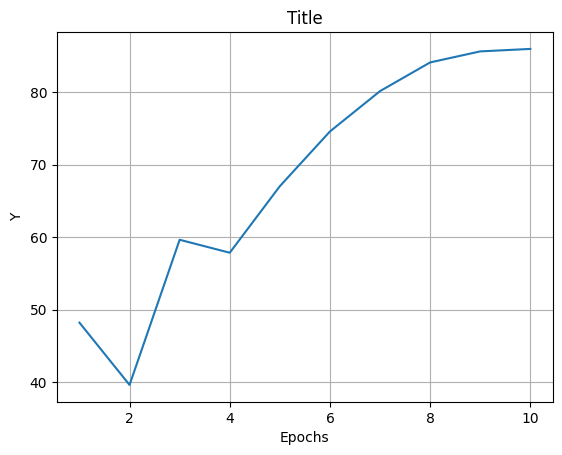

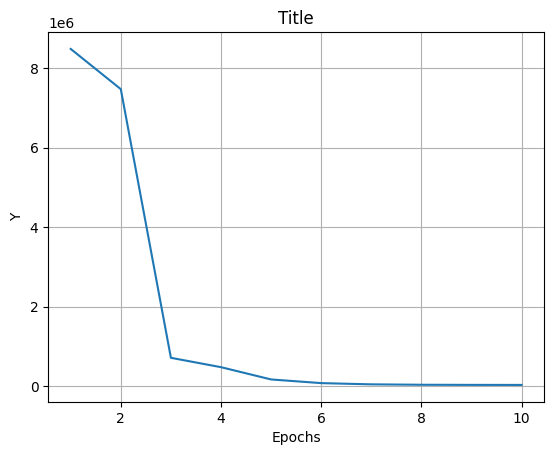

In [35]:
# Adjust the following three hyperparameters to achieve the best accuracy:
lr = 0.5
n_epochs = 10
reg_const = 0.05

svm_fashion = SVM(n_class_fashion, lr, n_epochs, X_train_fashion.shape[1], 1, reg_const)

# Refer to hints in the calculate_gradient and train methods of the SVM class in "models/svm.py"
svm_fashion.train(X_train_fashion, y_train_fashion)

In [36]:
pred_svm = svm_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_fashion)))

The training accuracy is given by: 85.944000


### Validate SVM on Fashion-MNIST

In [37]:
pred_svm = svm_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_fashion)))

The validation accuracy is given by: 84.630000


### Test SVM on Fashion-MNIST

In [38]:
pred_svm = svm_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_fashion)))

The testing accuracy is given by: 83.750000


### SVM_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [39]:
output_submission_csv('kaggle/svm_submission_fashion.csv', svm_fashion.predict(X_test_fashion))

## Train SVM on Rice

Epoch 1/10, Accuracy: 98.5244
Epoch 1/10, Loss: 647.7159
Epoch 2/10, Accuracy: 99.7434
Epoch 2/10, Loss: 72.7985
Epoch 3/10, Accuracy: 99.1568
Epoch 3/10, Loss: 208.0031
Epoch 4/10, Accuracy: 99.9817
Epoch 4/10, Loss: 49.3965
Epoch 5/10, Accuracy: 99.9908
Epoch 5/10, Loss: 43.9767
Epoch 6/10, Accuracy: 99.9817
Epoch 6/10, Loss: 50.1958
Epoch 7/10, Accuracy: 99.9908
Epoch 7/10, Loss: 42.8945
Epoch 8/10, Accuracy: 99.9908
Epoch 8/10, Loss: 40.3724
Epoch 9/10, Accuracy: 100.0000
Epoch 9/10, Loss: 39.2351
Epoch 10/10, Accuracy: 100.0000
Epoch 10/10, Loss: 39.5608


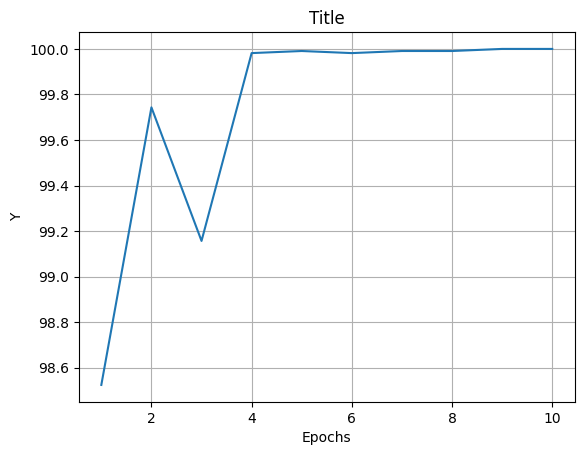

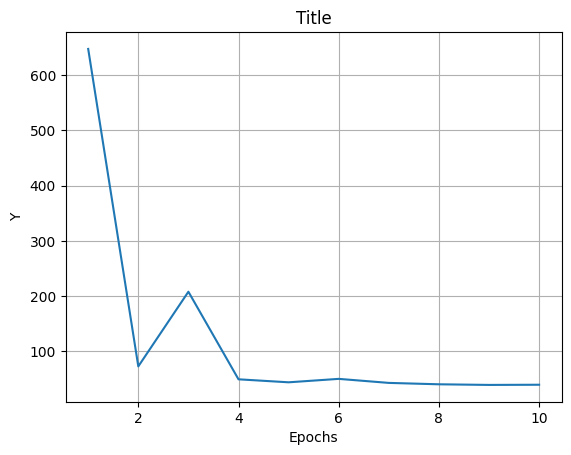

In [40]:
# Adjust the following three hyperparameters to achieve the best accuracy:
lr = 0.5
n_epochs = 10
reg_const = 0.05

svm_RICE = SVM(n_class_RICE, lr, n_epochs, X_train_RICE.shape[1], 1, reg_const)
svm_RICE.train(X_train_RICE, y_train_RICE)

In [41]:
pred_svm = svm_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_RICE)))

The training accuracy is given by: 100.000000


### Validate SVM on Rice

In [42]:
pred_svm = svm_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_RICE)))

The validation accuracy is given by: 99.945010


## Test SVM on Rice

In [43]:
pred_svm = svm_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_RICE)))

The testing accuracy is given by: 100.000000


# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this sotmax output to train the model.

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with:
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/softmax.py**

The following code:
- Creates an instance of the Softmax classifier class
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train Softmax on Fashion-MNIST

Epoch 1/15, Accuracy: 74.2060


/content/drive/MyDrive/CS444Assignment1/assignment1/models/softmax.py:157: RuntimeWarning: divide by zero encountered in log
  loss += -1 * np.log(y_score)


Epoch 1/15, Loss: inf
Epoch 2/15, Accuracy: 77.2700
Epoch 2/15, Loss: 373364.3065
Epoch 3/15, Accuracy: 78.1420
Epoch 3/15, Loss: inf
Epoch 4/15, Accuracy: 81.0640
Epoch 4/15, Loss: 65760.9177
Epoch 5/15, Accuracy: 83.9220
Epoch 5/15, Loss: 30882.9910
Epoch 6/15, Accuracy: 85.7480
Epoch 6/15, Loss: 22306.6423
Epoch 7/15, Accuracy: 86.8160
Epoch 7/15, Loss: 19601.0761
Epoch 8/15, Accuracy: 87.3240
Epoch 8/15, Loss: 18712.6413
Epoch 9/15, Accuracy: 87.4780
Epoch 9/15, Loss: 18405.0096
Epoch 10/15, Accuracy: 87.5980
Epoch 10/15, Loss: 18226.6664
Epoch 11/15, Accuracy: 87.6900
Epoch 11/15, Loss: 18160.0939
Epoch 12/15, Accuracy: 87.6800
Epoch 12/15, Loss: 18145.0517
Epoch 13/15, Accuracy: 87.6660
Epoch 13/15, Loss: 18140.7528
Epoch 14/15, Accuracy: 87.6740
Epoch 14/15, Loss: 18139.3312
Epoch 15/15, Accuracy: 87.6720
Epoch 15/15, Loss: 18138.8007


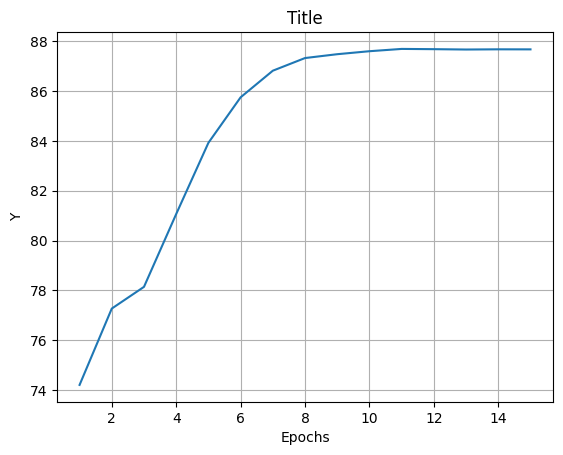

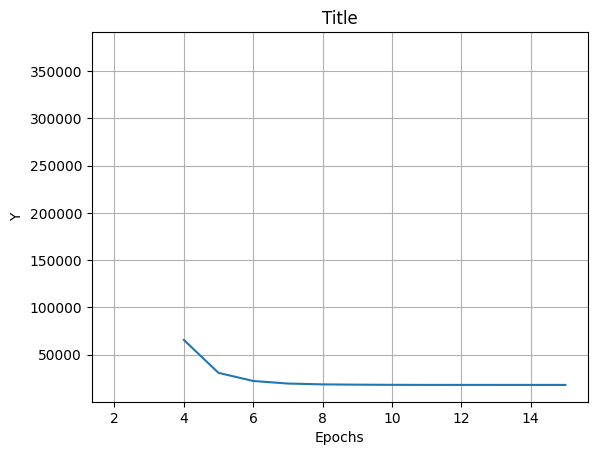

In [44]:
lr = 0.5
n_epochs = 15
reg_const = 0.001

softmax_fashion = Softmax(n_class_fashion, lr, n_epochs, X_train_fashion.shape[1], 1, reg_const)

# Refer to hints in the calculate_gradient and train methods of the Softmax class in "models/softmax.py"
softmax_fashion.train(X_train_fashion, y_train_fashion)

In [45]:
pred_softmax = softmax_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_fashion)))

The training accuracy is given by: 87.672000


### Validate Softmax on Fashion-MNIST

In [46]:
pred_softmax = softmax_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_fashion)))

The validation accuracy is given by: 84.550000


### Testing Softmax on Fashion-MNIST

In [47]:
pred_softmax = softmax_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_fashion)))

The testing accuracy is given by: 83.710000


### Softmax_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [48]:
output_submission_csv('kaggle/softmax_submission_fashion.csv', softmax_fashion.predict(X_test_fashion))

## Train Softmax on Rice

Epoch 1/15, Accuracy: 99.9725
Epoch 1/15, Loss: 15.0752
Epoch 2/15, Accuracy: 99.9908
Epoch 2/15, Loss: 16.5980
Epoch 3/15, Accuracy: 100.0000
Epoch 3/15, Loss: 18.8176
Epoch 4/15, Accuracy: 100.0000
Epoch 4/15, Loss: 19.5059
Epoch 5/15, Accuracy: 100.0000
Epoch 5/15, Loss: 19.6943
Epoch 6/15, Accuracy: 100.0000
Epoch 6/15, Loss: 19.7641
Epoch 7/15, Accuracy: 100.0000
Epoch 7/15, Loss: 19.7922
Epoch 8/15, Accuracy: 100.0000
Epoch 8/15, Loss: 19.8036
Epoch 9/15, Accuracy: 100.0000
Epoch 9/15, Loss: 19.8081
Epoch 10/15, Accuracy: 100.0000
Epoch 10/15, Loss: 19.8099
Epoch 11/15, Accuracy: 100.0000
Epoch 11/15, Loss: 19.8106
Epoch 12/15, Accuracy: 100.0000
Epoch 12/15, Loss: 19.8109
Epoch 13/15, Accuracy: 100.0000
Epoch 13/15, Loss: 19.8110
Epoch 14/15, Accuracy: 100.0000
Epoch 14/15, Loss: 19.8111
Epoch 15/15, Accuracy: 100.0000
Epoch 15/15, Loss: 19.8111


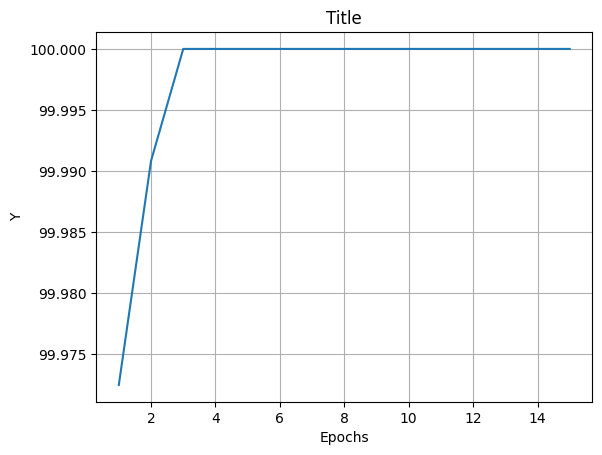

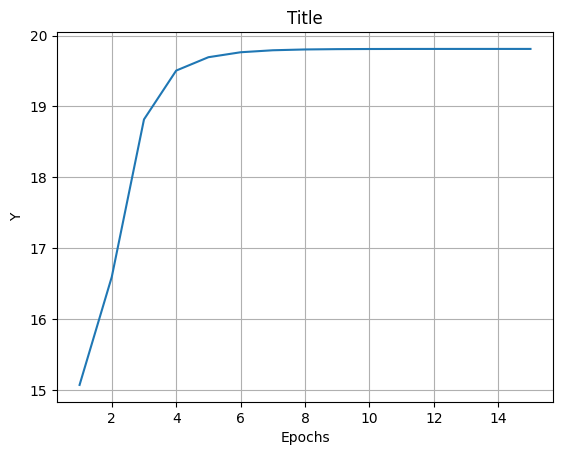

In [49]:
lr = 0.5
n_epochs = 15
reg_const = 0.001

softmax_RICE = Softmax(n_class_RICE, lr, n_epochs, X_train_RICE.shape[1], 1, reg_const)
softmax_RICE.train(X_train_RICE, y_train_RICE)

In [50]:
pred_softmax = softmax_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_RICE)))

The training accuracy is given by: 100.000000


### Validate Softmax on Rice

In [51]:
pred_softmax = softmax_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_RICE)))

The validation accuracy is given by: 99.945010


### Testing Softmax on Rice

In [52]:
pred_softmax = softmax_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_RICE)))

The testing accuracy is given by: 100.000000


# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update.
- **Number of Epochs** - As described for perceptron.
- **Threshold** - The decision boundary of the classifier.


You will implement the Logistic Classifier in the **models/logistic.py**

The following code:
- Creates an instance of the Logistic classifier class
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [70]:
learning_rate = 0.5
n_epochs = 10
threshold = 0.5

lr = Logistic(learning_rate, n_epochs, threshold, X_train_RICE.shape[1], 1, 0.01)

# Refer to hints in the sigmoid and train methods of the Logistic class in "models/logistic.py"
lr.train(X_train_RICE, y_train_RICE)

Epoch 1/10, Accuracy: 99.8350
Epoch 2/10, Accuracy: 99.8625
Epoch 3/10, Accuracy: 99.8900
Epoch 4/10, Accuracy: 99.8992
Epoch 5/10, Accuracy: 99.9083
Epoch 6/10, Accuracy: 99.9267
Epoch 7/10, Accuracy: 99.9267
Epoch 8/10, Accuracy: 99.9267
Epoch 9/10, Accuracy: 99.9267
Epoch 10/10, Accuracy: 99.9267


In [69]:
pred_lr = lr.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_RICE)))

The training accuracy is given by: 99.926679


### Validate Logistic Classifer

In [68]:
pred_lr = lr.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_RICE)))

The validation accuracy is given by: 99.835029


### Test Logistic Classifier

In [67]:
pred_lr = lr.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_RICE)))

The testing accuracy is given by: 99.890019
